# Предобработка данных 
1) Разбиение на пакеты в зависимости от мета данных и сохранение данных пакетов.


From Authors

Training of neural networks for automated diagnosis of pigmented skin lesions is hampered by the small size and lack of diversity of available dataset of dermatoscopic images. We tackle this problem by releasing the HAM10000 ("Human Against Machine with 10000 training images") dataset. We collected dermatoscopic images from different populations, acquired and stored by different modalities. The final dataset consists of 10015 dermatoscopic images which can serve as a training set for academic machine learning purposes. Cases include a representative collection of all important diagnostic categories in the realm of pigmented lesions: Actinic keratoses and intraepithelial carcinoma / Bowen's disease (akiec), basal cell carcinoma (bcc), benign keratosis-like lesions (solar lentigines / seborrheic keratoses and lichen-planus like keratoses, bkl), dermatofibroma (df), melanoma (mel), melanocytic nevi (nv) and vascular lesions (angiomas, angiokeratomas, pyogenic granulomas and hemorrhage, vasc).

More than 50% of lesions are confirmed through histopathology (histo), the ground truth for the rest of the cases is either follow-up examination (follow_up), expert consensus (consensus), or confirmation by in-vivo confocal microscopy (confocal). The dataset includes lesions with multiple images, which can be tracked by the lesion_id-column within the HAM10000_metadata file.

# Skin Lessions Types
7 types of skin lessions

1) Actinic keratoses and intraepithelial carcinoma  / Bowen's disease - akiec

2) basal cell carcinoma - bcc

3) benign keratosis-like lesions (solar lentigines / seborrheic keratoses and lichen-planus like keratoses) - bkl

4) dermatofibroma - df

5) melanoma - mel

6) melanocytic nevi - nv 

7) vascular lesions (angiomas, angiokeratomas, pyogenic granulomas and hemorrhage) - vasc


In [1]:
from keras import layers
from keras import models
from keras.preprocessing.image import img_to_array, load_img
import pandas as pd

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [18]:
data = pd.read_csv('HAM10000_metadata.csv',delimiter = ',')
img_data = pd.read_csv('hmnist_8_8_RGB.csv',delimiter = ',')
data = data.dropna(axis = 0, subset = ['age'])
data = data.drop_duplicates(subset = ['lesion_id'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7418 entries, 0 to 10010
Data columns (total 7 columns):
lesion_id       7418 non-null object
image_id        7418 non-null object
dx              7418 non-null object
dx_type         7418 non-null object
age             7418 non-null float64
sex             7418 non-null object
localization    7418 non-null object
dtypes: float64(1), object(6)
memory usage: 463.6+ KB


In [3]:
data['age'] = data['age'].round().astype(int)
female = data[data['sex'] == 'female']
male = data[data['sex'] == 'male']

In [4]:
data[data['localization'] == 'acral'].count()

lesion_id       7
image_id        7
dx              7
dx_type         7
age             7
sex             7
localization    7
dtype: int64

In [5]:
female['localization'].unique()

array(['back', 'trunk', 'chest', 'face', 'unknown', 'abdomen', 'scalp',
       'lower extremity', 'genital', 'neck', 'hand', 'upper extremity',
       'foot', 'ear', 'acral'], dtype=object)

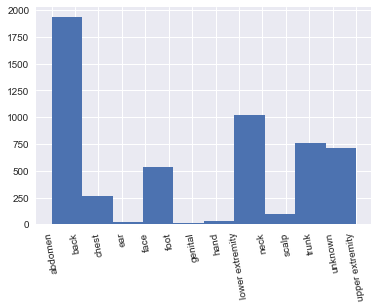

In [80]:
male['localization'].hist(xrot=100)

In [13]:
data['lesion_id']

0        HAM_0000118
1        HAM_0000118
2        HAM_0002730
3        HAM_0002730
4        HAM_0001466
5        HAM_0001466
6        HAM_0002761
7        HAM_0002761
8        HAM_0005132
9        HAM_0005132
10       HAM_0001396
11       HAM_0004234
12       HAM_0004234
13       HAM_0001949
14       HAM_0001949
15       HAM_0007207
16       HAM_0001601
17       HAM_0001601
18       HAM_0007571
19       HAM_0007571
20       HAM_0006071
21       HAM_0003301
22       HAM_0003301
23       HAM_0004884
24       HAM_0004884
25       HAM_0002521
26       HAM_0002521
27       HAM_0006574
28       HAM_0006574
29       HAM_0001480
            ...     
9985     HAM_0006024
9986     HAM_0006220
9987     HAM_0004809
9988     HAM_0001036
9989     HAM_0004384
9990     HAM_0004462
9991     HAM_0001152
9992     HAM_0004282
9993     HAM_0000545
9994     HAM_0000193
9995     HAM_0000193
9996     HAM_0006180
9997     HAM_0006180
9998     HAM_0004282
9999     HAM_0000356
10000    HAM_0004282
10001    HAM_

In [14]:
data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [17]:
img_data[117:120]

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel0183,pixel0184,pixel0185,pixel0186,pixel0187,pixel0188,pixel0189,pixel0190,pixel0191,label
117,211,196,205,213,199,207,215,203,212,217,...,211,202,207,210,197,204,207,190,199,2
118,201,187,196,210,196,204,219,202,211,226,...,208,189,200,200,177,189,192,172,179,2
119,156,128,145,157,125,147,160,132,151,159,...,154,125,140,152,125,140,147,113,120,2
